#        Index
#### 1.What is Eular-Maruyama Scheme
#### 2.Simulating Price using Eular-Maruyama Scheme
#### 3.European Binary Options Pricing
#### 4.European Lookback Options Pricing
#### 5.Extension with Stochastic Volatility and Stochastic Interest Rate
#### 6.Conclusion and Reference

# 1. What is Euler-Maruyama Scheme

First we define a stochastic differential equation as following
$$ dX_{t} = a(X_{t})dt+b(X_{t})dW_{t} \ \ \ \ \ \ (1)\ \ \ \ SDE$$

Where $W_{t}$ is a $Winener\  Process$,

and the initial condition of this SDE is $X_{0} = x_{0}$

The $solution$ of this SDE with the $Euler–Maruyama Scheme$ is a $Marcov$ $Chain$, here we call it $Y$, defined as follows:

$$Y_{n+1}= Y_{n}+a(Y_{n})*\Delta t + b(Y_{n})*\Delta W_{n} \ \ \ \ \ (2)\ Numerical \ \ Solution  $$

Where

we partition the interval $[0,T]$ into $N$ equal subintervals of with $\Delta t > 0$ :

$$0 = t_{0} < t_{1}< . . . < T_{N} = T$$ 
and
$$\Delta t = T/N\ \ \ \ \ \ \ \ \ \ \ \ (3)\ Definition\ of\ \Delta t$$

$$\Delta W_{n} = W_{t_{n+1}}-W_{t_{n}}\ \ \ \ \ \ \ \ (4) Definition \ \ \ of \ \ \Delta_{W_{n}}$$


Second, Let's look at an example of using Euler-Maruyama method to solve Ornstein-Uhlenbeck Process which is defined by:

$$dY_{t} = \theta*(\mu - Y_{t})dt + \sigma*dW_{t}\ \ \ \ \ \ (5) Ornstein-Uhlenbeck\ Process$$

-0.006303109029082253


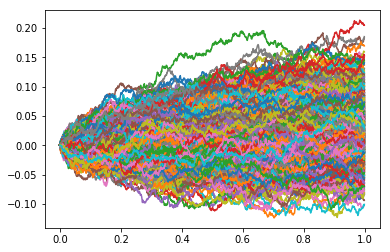

In [115]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 1000#Number of simulations

t_init = 0 #Start Time
t_end = 1  #End Time
N = 1000  #Number of nodes in every single Simulation
dt = float(t_end - t_init)/1000
y_init = 0;#Initial Point

c_theta = 0.7 ##theta
c_mu = 0.05 ##mu
c_sigma = 0.06

def mu(y,t):
    return c_theta*(c_mu - y)

def sigma(y,t):
    return c_sigma

def dW(delta_t):
    return np.random.normal(loc = 0.0, scale= np.sqrt(delta_t))

ts = np.arange(t_init,t_end,dt)
ys = np.zeros(N)
ys[0] = y_init

for _ in range(num_sims):
    for i in range(1,ts.size):
        t = (i-1)*dt
        y = ys[i-1]
        ys[i] = y + mu(y,t)*dt + sigma(y,t)*dW(dt)
    plt.plot(ts,ys)

print (np.mean(ys))
plt.show()

$Ornstein-Uhlenbeck\ Process$ model can be an important model in financial modeling world espeically when it comes to inerest rate modeling. This model will be further discussed in the rest part of article.

# 2. Simulating Price using Euler-Maruyama Scheme

Now we want to use Euler-Maruyama Scheme to simulate the price of an asset, the formula we can use is like 

$$ \delta S = rS\delta t + \sigma S \sqrt{\delta t}\phi \ \ \ \ \ \ (6)Pricing Path $$

Here $\delta t$ refers to as the time step in the discrete time, and $\phi$ refers to a standard normal distribution.

Now let us start our $Monte\ Carlo\ Simulation$ for stock price paths based on Euler-Maruyama Scheme

Before starting our experiment, it is a good habit to make clear that:
$$S_{0} = 100$$

$$T = 1 year$$

$$\sigma_{annual} = 20 \%$$

$$R_{risk-free} = 5\%$$

Now let me start with creating a class for Monte Carlo Simulation

In [179]:
###Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
###Create a class
class monte_carlo:
    
    def __init__(self,initial_price,annual_vol,risk_free_rate):
        self.initial_price = initial_price
        self.annual_vol = annual_vol
        self.risk_free_rate = risk_free_rate
        self.simulation_df = pd.DataFrame()
    
    def monte_carlo_sim(self,sims_num,days_num):
        annual_vol = self.annual_vol
        initial_price = self.initial_price
        risk_free_rate = self.risk_free_rate
        daily_rf = self.risk_free_rate/days_num
        delta_t = 1/251
    
        for x in range(sims_num):
            count = 0
        
            price_series=[]
            price_series.append(initial_price)
        
            for i in range(days_num):
                if count == days_num:
                    break
                delta_price = risk_free_rate*price_series[count]*delta_t + annual_vol*price_series[count]*np.sqrt(delta_t)*np.random.normal(0,1)
                price = price_series[count] + delta_price
                price_series.append(price)
                count +=1
                
            self.simulation_df[x] = (price_series)
            x=x+1
    

In [180]:
### Simulation
mc = monte_carlo(100.0,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc.monte_carlo_sim(1000,251)#Simulation number = 100, day number = 251

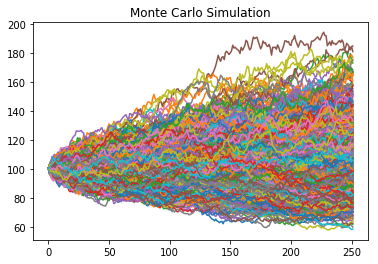

In [181]:
###Visualization
plt.plot(mc.simulation_df)
plt.title('Monte Carlo Simulation')
plt.show()

# 3. European Binay Options Pricing

## 3.1 Payoff of Binary Options

Usually we can determine the value of options by dicounting payoff under the risk neutral density using following formula:

$$V(S(T),T) = E[e^{-\int^{T}_{t}r_{\tau}d{\tau}}Payoff]\ \ \ \ \ (7) Discounting $$

So for pricing our binary options with strike price $ k =100$, we only need to know the payoff situations of put or call

For binary put options:
$$
Payoff(T)=\begin{cases}
Q,&S_{T}>=K \\ 0,&S_{T}<K \
\end{cases}
$$

For binary call options:
$$
Payoff(T)=\begin{cases}
Q,&S_{T}<K \\ 0,&S_{T}>=K \
\end{cases}
$$

Clearly, the value of $Q$ will not directly influence our analysis on pricing, so here we can assume $Q=20$

## 3.2 Pricing Binary Options

Assume after Monte Carlo Simulations of n times, we have a set with the final price of stocks

$$S =\{ {P_{1},P_{2},...,P_{n}}\}$$

we can easily get the $Payoff$ of Binary Call Options and Binary Put Options based on $Payoff(T)$. Then we get 2 sets representing the possible future payoffs put options

$$Set_{Put\ Payoff} = \{Payoff_{Put_{1}},Payoff_{Put_{2}},...,Payoff_{Put_{n}}\}$$

$$Set_{Call\ Payoff} = \{Payoff_{Call_{1}},Payoff_{Call_{2}},...,Payoff_{Call_{n}}\}$$

Now we can easily average these 2 sets to get the prices of options
$$P(T) = Average(S_{Put\ Payoff})e^{-\int^{T}_{t}r_{\tau}d{\tau}}\ \ \ \ \ (8)$$
$$C(T) = Average(S_{Callt\ Payoff})e^{-\int^{T}_{t}r_{\tau}d{\tau}}\ \ \ \ \ (9)$$

Now with so much imformation, let me start coding

## 3.3 Codings

In [182]:
#Running Time 10S - 20S
###Create 3 Monte Carlo Simulations, each has simulation number of 500, 1000, 2000
mc_500 = monte_carlo(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_500.monte_carlo_sim(500,251) # Simulation number = 500, day number = 251

mc_2000 = monte_carlo(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_2000.monte_carlo_sim(2000,251) # Simulation number = 1000, day number = 251

mc_10000 = monte_carlo(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_10000.monte_carlo_sim(10000,251) # Simulation number = 1000, day number = 251

In [183]:
###We slice the final price states
final_prices_500 = mc_500.simulation_df.iloc[251]
final_prices_2000 = mc_2000.simulation_df.iloc[251]
final_prices_10000 = mc_10000.simulation_df.iloc[251]

With the final price states, we can easily compute the payoff of binary options
We first define 2 functions for pricing

In [184]:
#Define the function for valuing the Binary Call Options
def pricing_call(final_prices):
    risk_free_rate = 0.05
    T = 1
    call_payoffs = pd.Series(range(1,final_prices.size))
    call_payoffs[final_prices< 100 ] = 0
    call_payoffs[final_prices >= 100 ] = 20
    call_price = call_payoffs.mean()*np.exp(-T*risk_free_rate)
    return call_price

In [185]:
#Define the function for valuing the Binary Put Options
def pricing_put(final_prices):
    risk_free_rate = 0.05
    T = 1
    put_payoffs = pd.Series(range(1,final_prices.size))
    put_payoffs[final_prices > 100 ] = 0
    put_payoffs[final_prices <= 100 ] = 20
    put_price = put_payoffs.mean()*np.exp(-T*risk_free_rate)
    return put_price

Now, we can easily average the payoffs and discount results to get our expected options prices 

In [186]:
call_price_500 = pricing_call(final_prices_500)
call_price_2000 = pricing_call(final_prices_2000)
call_price_10000= pricing_call(final_prices_10000)

put_price_500 = pricing_put(final_prices_500)
put_price_2000 = pricing_put(final_prices_2000)
put_price_10000= pricing_put(final_prices_10000)

In [187]:
print(f'The Price of Call with 500 sims is approximately {call_price_500}.')
print(f'The Price of Call with 2000sims is approximately {call_price_2000}.')
print(f'The Price of Call with 10000 sims is approximately {call_price_10000}.')
print('-------------------------------------------------------------------------------')
print(f'The Price of Put with 500 sims is approximately {put_price_500}.')
print(f'The Price of Put with 2000 sims is approximately {put_price_2000}.')
print(f'The Price of Put with 10000 sims is approximately {put_price_10000}.')

The Price of Call with 500 sims is approximately 10.21761465996759.
The Price of Call with 2000sims is approximately 10.83992310661644.
The Price of Call with 10000 sims is approximately 10.632003248544835.
-------------------------------------------------------------------------------
The Price of Put with 500 sims is approximately 8.80697383004669.
The Price of Put with 2000 sims is approximately 8.18466538339784.
The Price of Put with 10000 sims is approximately 8.392585241469446.


## 3.4 BS-Model Theoretical Pricing



We can also generate the price of Binary Options using BS Model
As before, we denote $k$ as strike price, $T=1$ as year to maturity, $\sigma$ as annual volatility, $R_{risk-free}$ as annual risk free rate, $\phi$ as the CDF of standard normal distribution, $Q$ as the cash income if exercised.

Based on BS model, we know the price of cash-or-nothing put should be:
$$P = Q*e^{-rT}\phi(-d_{2}) \ \ \ \ \ \ \  (10)$$
the price of cash-or-nothing put should be:
$$C = Q*e^{-rT}\phi(d_{2}) \ \ \ \ \ \ \  (11)$$

Where $$d1=\frac{ln \frac{s}{k}+(r+\sigma ^{2}/2)T}{\sigma \sqrt{T}} \ \ \ \ \ \ \ (12)$$
$$d2= d1- \sigma \sqrt{T} \ \ \ \ \ \ \ (13)$$

Thus the theoretical price of European call options shall be
$$C(T) = 10.647301$$,

the theoretical price of call options shall be $$P(T)=8.3772873$$

# 3.5 Error Analysis and Observations on Binary Options

Now we have our theoretical BS-Model based options prices and complete steps to pricing our options numerically, we can now start analyze the error caused by different simulation times

| Type | Path Number | Theoretical Price | Absolute Difference | Relative Difference|
| --- | --- | --- | --- |---
| Call |500 |10.647301|0.26571|2.41%|
| Call | 2000 |10.647301|0.192622|1.81%|
| Call | 10000 |10.637301|-0.00769|-0.07%|
| 
| Put | 500 |8.3772873|-0.25657|-3.06%|
| Put | 2000 |8.3772873|-0.19262|-2.30%|
| Put | 10000 |8.3772873|0.007687|0.09%|




Based on the table, we will have following interesting observations:

1)As the increase of the simulation times, both the numerical simulated price of put and call converges to the BS-Model theoretical price.

2)The simulated price of call options is more accurate than the simulated price of put options. It may be caused by the computer pseudo number generating regimes.

3)The Monte Carlo simulation based on Euler Method seems to tend to overprice Binary Call Options but underestimate Binary Put Options. It may be caused by that in the Python pseudo number generator, higher probability the extreme positive number will be returned

# 4. European Lookback Options Pricing

## 4.1 Floating Strike Scheme

### 4.1.1 Payoff Scheme
This kind of option's strike price is the optimal value of the underlying asset's price before the maturity of the option. 

(1)For the call, the strike price is the underlying asset's $minimum$ price during the option's life 

(2)The strike price of the put is the underlying asset's $highest$ pricing during the option's life. 

The payoff functions for floating lookback options are given below by:

$$
Payoff(T)=\begin{cases}
max(S_{T}-S_{min},0) = S_{T}-S_{min},&Call \\ max(S_{max}-S_{T},0)=S_{max}-S_{T},&Put \
\end{cases}
$$

### 4.1.2 Pricing with Discrete Sampling Monte Carlo Simulation

As I did before, I still use $Euler-Maruyama$ method to simulate the price paths of underlying assets. For each price path, I can get a payoff of the call computed by $S_{T} - S_{min}$, 

where $S_{T}$ refers to the price of underlying asset at maturity, $S_{min}$ is the discretely sampled lowest underlying asset price, 

and the payoff of the put computed by $S_{max}-S_{T}$, 

where $S_{max}$ represents the highest price discretely sampled during the period, $S_{T}$ represents the price of asset at maturity

After we get a set of payoff, we can again use $Formula (7)$ to compute the price of the option:

$$V(S(T),T) = E[e^{-\int^{T}_{t}r_{\tau}d{\tau}}Payoff]\ \ \ \ \ (7) Discounting $$

Codings are attached below:

In [188]:
### We still use the price paths generated before for valuing the Binary Options ###
def pricing_FloatingLookback_discrete(df_paths,isCall,Rf,Years):
    T = df_paths.shape[0]
    if ( isCall ):
        payoff_series = df_paths.iloc[T-1] - df_paths.min(axis = 0)
        average_payoff = payoff_series.mean()
    if ( not isCall):
        payoff_series = -df_paths.iloc[T-1] + df_paths.max(axis = 0)
        average_payoff = payoff_series.mean()
        
    return np.exp(-Rf*Years)*average_payoff

In [213]:
#Pricing the floating lookback call and put with 500 simulations
flt_lkb_call_500 = pricing_FloatingLookback_discrete(mc_500.simulation_df,True,0.05,1)
flt_lkb_put_500 = pricing_FloatingLookback_discrete(mc_500.simulation_df,False,0.05,1)
#Pricing the floating lookback call and put with 1000 simulations
flt_lkb_call_2000 = pricing_FloatingLookback_discrete(mc_2000.simulation_df,True,0.05,1)
flt_lkb_put_2000 = pricing_FloatingLookback_discrete(mc_2000.simulation_df,False,0.05,1)
#Pricing the floating lookback call and put with 2000 simulations
flt_lkb_call_10000 = pricing_FloatingLookback_discrete(mc_10000.simulation_df,True,0.05,1)
flt_lkb_put_10000 = pricing_FloatingLookback_discrete(mc_10000.simulation_df,False,0.05,1)

In [214]:
#Output results
print(f'The Price of Floating Lookback Call with 500 sims is approximately {flt_lkb_call_500}.')
print(f'The Price of Floating Lookback Calll with 2000 sims is approximately {flt_lkb_call_2000}.')
print(f'The Price of Floating Lookback Call with 10000 sims is approximately {flt_lkb_call_10000}.')
print('-------------------------------------------------------------------------------------------------')
print(f'The Price of Floating Lookback Put with 500 sims is approximately {flt_lkb_put_500}.')
print(f'The Price of Floating Lookback Put with 2000 sims is approximately {flt_lkb_put_2000}.')
print(f'The Price of Floating Lookback Put with 10000 sims is approximately {flt_lkb_put_10000}.')

The Price of Floating Lookback Call with 500 sims is approximately 16.108841478289847.
The Price of Floating Lookback Calll with 2000 sims is approximately 16.07405742726674.
The Price of Floating Lookback Call with 10000 sims is approximately 16.72928477271876.
-------------------------------------------------------------------------------------------------
The Price of Floating Lookback Put with 500 sims is approximately 13.942553012593045.
The Price of Floating Lookback Put with 2000 sims is approximately 13.70347158867272.
The Price of Floating Lookback Put with 10000 sims is approximately 13.364542514879146.


### 4.1.3.1 Pricing with Continuous Sampling (BS-Model Method)

It is difficult to simulate the continuous situation numerically so here we replace it with BS-Model which is based on the continuous movement of underlying asset price. Then I will analyze error caused by Euler Method's Monte Carlo Simulation .

Assume that there exists a continuously-compounded risk-free interest rate $r > 0$, and a constant stock's volatility $\sigma >0$. 

Assume that the time to maturity is $T>0$

We denote $M = maxS_{u} $ where $0 \leq u \leq T$, which means $M$ is the maximum stock price over the period

We denote $m = minS_{u} $ where $0 \leq u \leq T$, which means $m$ is the minimum stock price over the period

Then we can compute the price of the lookback $call$ option with floating strike by:

$$C(T) = S \phi(a_{1}(S,m)) - me^{-rT}\phi(a2(S,m))- \frac{S\sigma ^{2}}{2r}(\phi(-a_{1}(S,m))-e^{-rt}(m/s)^{2r/\sigma^{2}}\phi(-a_{3}(S,m)))\ \ \ \ \ \ \ (14)$$

And the price of the lookback put option with floating strike is:

$$P(T) = -S\phi(-a_{1}(S,M))+Me^{-rt}\phi(-a_{2}(S,M))+\frac{S\sigma ^ {2}}{2r}(\phi(a_{1}(S,M)))-e^{-rt}(M/S)^{\frac{2r}{\sigma^{2}}}\phi(a_{3}(S,M))) \ \ \ \ \ \ \ (15)$$

where 

 $$a_{1}(S,H) = \frac{ln(S/H) + (r+\frac{\sigma ^{2}}{2})T}{\sigma\sqrt{T}} \ \ \ \ \ \ \ (16.1)$$

 $$a_{2}(S,H) = \frac{ln(S/H) + (r-\frac{\sigma ^{2}}{2})T}{\sigma\sqrt{T}} = a_{1}(S,H) - \sigma \sqrt{T} \ \ \ \ \ (16.2)$$

 $$a_{3}(S,H) = \frac{ln(S/H) - (r-\frac{\sigma ^{2}}{2})T}{\sigma\sqrt{T}} = a_{1}(S,H) - \frac{2r \sqrt{T}}{\sigma} \ \ \ \ \ \ (16.3)$$
 
Then we can compute the prices of the floating lookback call option and floating lookback put option



## 4.2 Fixed Strike Scheme
### 4.2.1 Payoff Scheme

This kind of options' exercise price is fixed . The difference is that the options is not exercised at the price at maturity: the payoff is the maximum difference between the optimal asset price and the strike. The payoff functions are given below:

$$
Payoff(T)=\begin{cases}
max(S_{max}-K,0) ,&Call \\ max(K - S_{min},0),&Put \
\end{cases}
$$

### 4.2.2 Pricing with Discrete Sampling with Monte Carlo Simulation

As I did before, I still use $Euler-Maruyama$ method to simulate the price paths of underlying assets. For each price path, I can get a payoff of the call computed by $S_{max} - K$, 

where $S_{max}$ refers to the highest stock price during the period, $K$ is the strike price, 

and the payoff of the put computed by $max(K-S_{min},0)$, 

where $S_{min}$ represents the lowest price discretely sampled during the period, $K$ represents the strike price of the stock

After we get a set of payoff, we can again use $Formula (7)$ to compute the price of the option:

$$V(S(T),T) = E[e^{-\int^{T}_{t}r_{\tau}d{\tau}}Payoff]\ \ \ \ \ (7) Discounting $$

Codings are attached below:

In [215]:
### We still use the price paths generated before for valuing the Binary Options ###
def pricing_FixedLookback_discrete(df_paths,isCall,K,Rf,Years):
    T = df_paths.shape[0]
    if ( isCall ):
        payoff_series = -K + df_paths.max(axis = 0)
        average_payoff = payoff_series.mean()
    if ( not isCall):
        payoff_series = K - df_paths.min(axis = 0)
        average_payoff = payoff_series.mean()
        
    return np.exp(-Rf*Years)*average_payoff

In [216]:
#Pricing the fixed lookback call and put with 500 simulations
fx_lkb_call_500 = pricing_FixedLookback_discrete(mc_500.simulation_df,True,100,0.05,1)
fx_lkb_put_500 = pricing_FixedLookback_discrete(mc_500.simulation_df,False,100,0.05,1)
#Pricing the fixed lookback call and put with 1000 simulations
fx_lkb_call_2000 = pricing_FixedLookback_discrete(mc_2000.simulation_df,True,100,0.05,1)
fx_lkb_put_2000 = pricing_FixedLookback_discrete(mc_2000.simulation_df,False,100,0.05,1)
#Pricing the fixed lookback call and put with 2000 simulations
fx_lkb_call_10000 = pricing_FixedLookback_discrete(mc_10000.simulation_df,True,100,0.05,1)
fx_lkb_put_10000 = pricing_FixedLookback_discrete(mc_10000.simulation_df,False,100,0.05,1)

In [217]:
#Output results
print(f'The Price of Fixed Lookback Call with 500 sims is approximately {fx_lkb_call_500}.')
print(f'The Price of Fixed Lookback Calll with 2000 sims is approximately {fx_lkb_call_2000}.')
print(f'The Price of Fixed Lookback Call with 10000 sims is approximately {fx_lkb_call_10000}.')
print('-------------------------------------------------------------------------------------------------')
print(f'The Price of Fixed Lookback Put with 500 sims is approximately {fx_lkb_put_500}.')
print(f'The Price of Fixed Lookback Put with 2000 sims is approximately {fx_lkb_put_2000}.')
print(f'The Price of Fixed Lookback Put with 10000 sims is approximately {fx_lkb_put_10000}.')

The Price of Fixed Lookback Call with 500 sims is approximately 18.040561758715537.
The Price of Fixed Lookback Calll with 2000 sims is approximately 18.095365990954384.
The Price of Fixed Lookback Call with 10000 sims is approximately 18.439225407176068.
-------------------------------------------------------------------------------------------------
The Price of Fixed Lookback Put with 500 sims is approximately 12.010832732167355.
The Price of Fixed Lookback Put with 2000 sims is approximately 11.682163024985073.
The Price of Fixed Lookback Put with 10000 sims is approximately 11.65460188042196.


# 5. Extension

## 5.1 Combination with Stochastic Interest Rate Model
### 5.1.1 Ornstein-Uhlenbeck Process for Interest Rate Modeling

In the real world, the interest rate is not constant but variable over the time, and it usually performs a strong $mean-reversion$ feature, so we can use some mean-reversion stochastic model to describe this interesting feature. $Ornstein-Uhlenbeck \ Process$ , a model for simulating the spot rate can be a good choice.

The $Ornstein-Uhlenbeck$ model for interest rate is defined as:
$$dr_{t} = a*(b - r_{t})dt + \sigma*dW_{t}\ \ \ \ \ \ (17)$$
where

$a$ is the rate at which the process $mean$ $reverts$, and $b$ is the $long\ run\ average\ interest\ rate$ and $\sigma$ can be viewed as the annual $volatility$ of the process. 

Assume $a = 0.8$, $b = 0.05$, $\sigma = 0.2$,

followings are codes for simulating interest rate term structure based on $Ornstein-Uhlenbeck$ model 

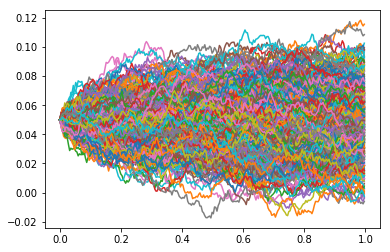

In [218]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 500#Number of simulations

t_init = 0 #Start Time
t_end = 1  #End Time
N = 251  #Number of nodes in every single Simulation
dt = float(t_end - t_init)/N
y_init = 0.05;#Initial Point

c_theta = 0.8 ##theta
c_mu = 0.05 ##mu
c_sigma = 0.03

def mu(y,t):
    return c_theta*(c_mu - y)

def sigma(y,t):
    return c_sigma

def dW(delta_t):
    return np.random.normal(loc = 0.0, scale= np.sqrt(delta_t))

ts = np.arange(t_init,t_end,dt)
ys = np.zeros(N)
ys[0] = y_init

for _ in range(num_sims):
    for i in range(1,ts.size):
        t = (i-1)*dt
        y = ys[i-1]
        ys[i] = y + mu(y,t)*dt + sigma(y,t)*dW(dt)
    plt.plot(ts,ys)
plt.show()

### 5.1.2 Options Valuation under Stochastic Interest Model

Now we will start pricing our options under stochastic Interest Model. We will keep on using Euler Method to simluate the stock price with the influence of changeable interest rate.

For convenience, the updated rule for stock price is defined below again:
$$ \delta S = r_{t}S\delta t + \sigma S \sqrt{\delta t}\phi \ \ \ \ \ \ (6)Pricing Path $$

and the updated rule for interest rate is defined as:
$$dr_{t} = a*(b - r_{t})dt + \sigma*dW_{t}\ \ \ \ \ \ (17)$$

$a$ is the rate at which the process $mean$ $reverts$, and $b$ is the $long\ run\ average\ interest\ rate$ and $\sigma$ can be viewed as the annual $volatility$ of the process. 

Assume $a = 0.8$, $b = 0.05$, $\sigma = 0.03$

Now let me start price simulation

In [219]:
###Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
###First define a new class
class monte_carlo_sr: ##This class is created for stock price monte carlo simulation with the non-constant interest model
    
    def __init__(self,initial_price,annual_vol,risk_free_rate):
        self.initial_price = initial_price
        self.annual_vol = annual_vol
        self.risk_free_rate = risk_free_rate
        self.simulation_df = pd.DataFrame()
        
     #this function is used to generate new Ornstein-Uhlenbeck Model based risk free rate
    # rf:risk free rate, a:reversion rate, b: long-run mean, sigma: volatility of interest rate
    def oruhModel(self,rf,a,b,sigma): 
        return rf + a*(b-rf)+ np.random.normal(loc = 0.0, scale= np.sqrt(self.delta_t))
    
    def monte_carlo_sim(self,sims_num,days_num,a,b,sigma):
        annual_vol = self.annual_vol
        initial_price = self.initial_price
        risk_free_rate = self.risk_free_rate
        daily_rf = self.risk_free_rate/days_num
        self.delta_t = 1.0/days_num
    
        for x in range(sims_num):
            count = 0
        
            price_series=[]
            price_series.append(initial_price)
        
            for i in range(days_num):
                if count == days_num:
                    break
                delta_price = risk_free_rate*price_series[count]*self.delta_t + annual_vol*price_series[count]*np.sqrt(self.delta_t)*np.random.normal(0,1)
                risk_free_rate = self.oruhModel(risk_free_rate,a,b,sigma) ###Update Risk Free Rate using oruh model
                price = price_series[count] + delta_price
                price_series.append(price)
                count +=1
                
            self.simulation_df[x] = (price_series)
            x=x+1

In [220]:
#Running Time 10S - 20S
###Create 3 Monte Carlo Simulations, each has simulation number of 500, 1000, 2000
### a = 0.8, b =0.05, sigma = 0.03
a = 0.8
b = 0.05
sigma = 0.03
mc_500_sr = monte_carlo_sr(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_500_sr.monte_carlo_sim(500,251,a,b,sigma) # Simulation number = 500, day number = 251

mc_2000_sr = monte_carlo_sr(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_2000_sr.monte_carlo_sim(2000,251,a,b,sigma) # Simulation number = 1000, day number = 251

mc_10000_sr = monte_carlo_sr(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_10000_sr.monte_carlo_sim(10000,251,a,b,sigma) # Simulation number = 1000, day number = 251

In [221]:
###We slice the final price states
final_prices_500_sr = mc_500_sr.simulation_df.iloc[251]
final_prices_2000_sr = mc_2000_sr.simulation_df.iloc[251]
final_prices_10000_sr = mc_10000_sr.simulation_df.iloc[251]

### 5.1.3 Valuation of Binary Options with Stochastic Interest Rate

In [222]:
call_price_500_sr = pricing_call(final_prices_500_sr)
call_price_2000_sr = pricing_call(final_prices_2000_sr)
call_price_10000_sr= pricing_call(final_prices_10000_sr)

put_price_500_sr= pricing_put(final_prices_500_sr)
put_price_2000_sr = pricing_put(final_prices_2000_sr)
put_price_10000_sr = pricing_put(final_prices_10000_sr)

In [223]:
print(f'The Price of Call with 500 sims is approximately {call_price_500_sr}.')
print(f'The Price of Call with 2000sims is approximately {call_price_2000_sr}.')
print(f'The Price of Call with 10000 sims is approximately {call_price_10000_sr}.')
print('-------------------------------------------------------------------------------')
print(f'The Price of Put with 500 sims is approximately {put_price_500_sr}.')
print(f'The Price of Put with 2000 sims is approximately {put_price_2000_sr}.')
print(f'The Price of Put with 10000 sims is approximately {put_price_10000_sr}.')

The Price of Call with 500 sims is approximately 10.751370649667388.
The Price of Call with 2000sims is approximately 10.525860365160476.
The Price of Call with 10000 sims is approximately 10.48740191588746.
-------------------------------------------------------------------------------
The Price of Put with 500 sims is approximately 8.273217840346891.
The Price of Put with 2000 sims is approximately 8.498728124853804.
The Price of Put with 10000 sims is approximately 8.53718657412682.


### 5.1.4 Valuation of Floating Lookback Options with Stochastic Interest Rate

In [224]:
#Pricing the floating lookback call and put with 500 simulations
flt_lkb_call_500_sr = pricing_FloatingLookback_discrete(mc_500_sr.simulation_df,True,0.05,1)
flt_lkb_put_500_sr = pricing_FloatingLookback_discrete(mc_500_sr.simulation_df,False,0.05,1)
#Pricing the floating lookback call and put with 1000 simulations
flt_lkb_call_2000_sr = pricing_FloatingLookback_discrete(mc_2000_sr.simulation_df,True,0.05,1)
flt_lkb_put_2000_sr = pricing_FloatingLookback_discrete(mc_2000_sr.simulation_df,False,0.05,1)
#Pricing the floating lookback call and put with 2000 simulations
flt_lkb_call_10000_sr = pricing_FloatingLookback_discrete(mc_10000_sr.simulation_df,True,0.05,1)
flt_lkb_put_10000_sr = pricing_FloatingLookback_discrete(mc_10000_sr.simulation_df,False,0.05,1)

In [225]:
#Output results
print(f'The Price of Floating Lookback Call with 500 sims is approximately {flt_lkb_call_500_sr}.')
print(f'The Price of Floating Lookback Calll with 2000 sims is approximately {flt_lkb_call_2000_sr}.')
print(f'The Price of Floating Lookback Call with 10000 sims is approximately {flt_lkb_call_10000_sr}.')
print('-------------------------------------------------------------------------------------------------')
print(f'The Price of Floating Lookback Put with 500 sims is approximately {flt_lkb_put_500_sr}.')
print(f'The Price of Floating Lookback Put with 2000 sims is approximately {flt_lkb_put_2000_sr}.')
print(f'The Price of Floating Lookback Put with 10000 sims is approximately {flt_lkb_put_10000_sr}.')

The Price of Floating Lookback Call with 500 sims is approximately 17.185104771122045.
The Price of Floating Lookback Calll with 2000 sims is approximately 16.411010230925417.
The Price of Floating Lookback Call with 10000 sims is approximately 16.528872211799953.
-------------------------------------------------------------------------------------------------
The Price of Floating Lookback Put with 500 sims is approximately 13.821168060208581.
The Price of Floating Lookback Put with 2000 sims is approximately 13.80756413374407.
The Price of Floating Lookback Put with 10000 sims is approximately 13.610274724538119.


### 5.1.5 Valuation of Fixed Lookback Options with Stochastic Interest Rate

In [226]:
#Pricing the fixed lookback call and put with 500 simulations
fx_lkb_call_500_sr = pricing_FixedLookback_discrete(mc_500_sr.simulation_df,True,100,0.05,1)
fx_lkb_put_500_sr = pricing_FixedLookback_discrete(mc_500_sr.simulation_df,False,100,0.05,1)
#Pricing the fixed lookback call and put with 1000 simulations
fx_lkb_call_2000_sr = pricing_FixedLookback_discrete(mc_2000_sr.simulation_df,True,100,0.05,1)
fx_lkb_put_2000_sr = pricing_FixedLookback_discrete(mc_2000_sr.simulation_df,False,100,0.05,1)
#Pricing the fixed lookback call and put with 2000 simulations
fx_lkb_call_10000_sr = pricing_FixedLookback_discrete(mc_10000_sr.simulation_df,True,100,0.05,1)
fx_lkb_put_10000_sr = pricing_FixedLookback_discrete(mc_10000_sr.simulation_df,False,100,0.05,1)

In [227]:
#Output results
print(f'The Price of Fixed Lookback Call with 500 sims is approximately {fx_lkb_call_500_sr}.')
print(f'The Price of Fixed Lookback Calll with 2000 sims is approximately {fx_lkb_call_2000_sr}.')
print(f'The Price of Fixed Lookback Call with 10000 sims is approximately {fx_lkb_call_10000_sr}.')
print('-------------------------------------------------------------------------------------------------')
print(f'The Price of Fixed Lookback Put with 500 sims is approximately {fx_lkb_put_500_sr}.')
print(f'The Price of Fixed Lookback Put with 2000 sims is approximately {fx_lkb_put_2000_sr}.')
print(f'The Price of Fixed Lookback Put with 10000 sims is approximately {fx_lkb_put_10000_sr}.')

The Price of Fixed Lookback Call with 500 sims is approximately 19.100033744697768.
The Price of Fixed Lookback Calll with 2000 sims is approximately 18.264056327472392.
The Price of Fixed Lookback Call with 10000 sims is approximately 18.311876724113024.
-------------------------------------------------------------------------------------------------
The Price of Fixed Lookback Put with 500 sims is approximately 11.906239086632826.
The Price of Fixed Lookback Put with 2000 sims is approximately 11.954518037197099.
The Price of Fixed Lookback Put with 10000 sims is approximately 11.827270212225029.


## 5.2 Combination with Stochastic Volatility Model
### 5.2.1  Heston Process for Volatility Modeling

Heston Model is a mathematical model which properly describes the volatility of a stock. In this model, volatility is $not \ constant$ but change with time, which again influence the path of stock price paths. We can say that Heston model is an $extension$ to classical Geometric Brownian Motion. The model is defined as follows,

Heston Model for Stock $Price$

$$dS_{t}= \mu S_{t}dt + \sqrt{v_{t}}S_{t}dW^{S}_{t} \ \ \ \ \ \ (18)$$

and the decription of the stochastic $volatility$ process is

$$d_{v_{t}} = c(\theta -v_{t})dt + \xi \sqrt{v_{t}}dW^{v}_{t} \ \ \ \ \ \ \ (19)$$

where

$v_{t}$ is the variance at time $t$, $\theta$ is the long run variance.

and

$$dW_{t}^{S}dW{t}^{v} = \rho d_{t}\ \ \ \ \ \ \ (20)$$  

$\rho$ decribe the $correlation$ between the correlation between the GBM of stock price and the GBM of variance

$$$$

The explicit numeric updating rule for $variance$ of stock price and the $variance$ of stock price variance is to can be described as below,


(1) Generate 2 normal variable $\phi_{1}$ and $\phi_{1}$ with correlation $\rho$. These 2 number can be generated using $Cholesky$ $Decomposition$ technique, which I would not like to talk about more. Here we will use very naive method to generate 2 variable with some correlation

(2) Update variance of price variance:
$$v_{t} = v_{t-1} + c(\theta-v_{t})\delta t + \xi*\phi_{2}*\sqrt{v_{t-1}\delta t} + \frac{1}{4}*\xi^{2}*(\rho^{2}-1)*\delta t$$

(3) Update stock price
$$S_{t} = S_(t-1)*(1+r*\delta t + \sqrt{v_{t}*\delta t}*\phi_{1} + \frac{1}{2}*v_{t}*{(\phi^{2}-1)}*\delta t)$$





$$$$
For convenience, we here make $c=1.2$, $\xi = 0.5$, $\rho = -0.6$, $v_{0} = 0.04$, $\theta = 0.04$.

Let us start simulating

### 5.2.2  Heston Process Simulation

In [250]:
###Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
###First define a new class
class monte_carlo_sv: ##This class is created for stock price monte carlo simulation with the non-constant interest model
    
    def __init__(self,initial_price,annual_vol,risk_free_rate):
        self.initial_price = initial_price
        self.annual_vol = annual_vol
        self.risk_free_rate = risk_free_rate
        self.simulation_df = pd.DataFrame()
    
    ###If you want to run monte carlo simulation with stochastic volatility, run it first###
    def set_Parameters(self,c,xi,rho,theta,var_vol):
        self.c = c
        self.xi = xi
        self.rho =rho
        self.theta = theta        
        self.var_vol = var_vol
        
     #this function is used to generate new Ornstein-Uhlenbeck Model based risk free rate
    # rf:risk free rate, a:reversion rate, b: long-run mean, sigma: volatility of interest rate
    def update_variance(self): 
        return rf + a*(b-rf)+ np.random.normal(loc = 0.0, scale= np.sqrt(self.delta_t))
    
    def monte_carlo_sim(self,sims_num,days_num):
        initial_price = self.initial_price
        risk_free_rate = self.risk_free_rate
        self.delta_t = 1.0/days_num
        delta_t = self.delta_t
    
        for x in range(sims_num):
            count = 0
            price_series=[]
            price_series.append(initial_price)
            annual_var = self.annual_vol*self.annual_vol

            for i in range(1,days_num):
                if count == days_num:
                    break
                ###Generate 2 variables with a correlation      
                phi1 = np.random.normal(0, 1)
                phi2 = (self.rho * phi1 + np.sqrt(1-self.rho*self.rho)*np.random.normal(0,1))*self.var_vol
                ###Updated volatility and stock price
                annual_var = annual_var + self.c*(self.theta - annual_var)*self.delta_t + self.xi * phi2 *np.sqrt(annual_var*self.delta_t)+0.25*self.xi*self.xi*(self.rho*self.rho - 1)*self.delta_t
                price = price_series[count]*(1 + risk_free_rate*self.delta_t + np.sqrt(annual_var*delta_t)*phi1+0.5*annual_var*(self.rho*self.rho-1)*self.delta_t)
                count= count + 1
                price_series.append(price)
            self.simulation_df[x] = (price_series)
            x=x+1

In [251]:
#Starting Simulation
#Running Time 10S - 20S
###Create 3 Monte Carlo Simulations, each has simulation number of 500, 1000, 2000
mc_500_sv = monte_carlo_sv(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_500_sv.set_Parameters(1.2,0.5,-0.6,0.04,0.01)
mc_500_sv.monte_carlo_sim(500,251) # Simulation number = 500, day number = 251

mc_2000_sv = monte_carlo_sv(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_2000_sv.set_Parameters(1.2,0.5,-0.6,0.04,0.01)
mc_2000_sv.monte_carlo_sim(2000,251) # Simulation number = 1000, day number = 251

mc_10000_sv = monte_carlo_sv(100,0.2,0.05) #Initial Price = 100, annual volatility = 0.2, annual risk free rate = 0.05 
mc_10000_sv.set_Parameters(1.2,0.5,-0.6,0.04,0.01)
mc_10000_sv.monte_carlo_sim(10000,251) # Simulation number = 1000, day number = 251


### 5.2.3 Valuation of Binary Options with Stochastic Volatility Process

In [252]:
###We slice the final price states
final_prices_500_sv = mc_500_sv.simulation_df.iloc[250]
final_prices_2000_sv = mc_2000_sv.simulation_df.iloc[250]
final_prices_10000_sv = mc_10000_sv.simulation_df.iloc[250]

In [253]:
### 4.1.3 Valuation of Binary Options with Stochastic Interest Rate
call_price_500_sv = pricing_call(final_prices_500_sv)
call_price_2000_sv = pricing_call(final_prices_2000_sv)
call_price_10000_sv= pricing_call(final_prices_10000_sv)

put_price_500_sv= pricing_put(final_prices_500_sv)
put_price_2000_sv = pricing_put(final_prices_2000_sv)
put_price_10000_sv = pricing_put(final_prices_10000_sv)

In [254]:
print(f'The Price of Call with 500 sims is approximately {call_price_500_sv}.')
print(f'The Price of Call with 2000sims is approximately {call_price_2000_sv}.')
print(f'The Price of Call with 10000 sims is approximately {call_price_10000_sv}.')
print('-------------------------------------------------------------------------------')
print(f'The Price of Put with 500 sims is approximately {put_price_500_sv}.')
print(f'The Price of Put with 2000 sims is approximately {put_price_2000_sv}.')
print(f'The Price of Put with 10000 sims is approximately {put_price_10000_sv}.')

The Price of Call with 500 sims is approximately 11.09449950018869.
The Price of Call with 2000sims is approximately 10.849440159387834.
The Price of Call with 10000 sims is approximately 10.639613845000484.
-------------------------------------------------------------------------------
The Price of Put with 500 sims is approximately 7.930088989825591.
The Price of Put with 2000 sims is approximately 8.175148330626445.
The Price of Put with 10000 sims is approximately 8.384974645013795.


### 5.2.4 Valuation of Fixed Lookback options with Stochastic Volatility Process 

In [261]:
#Pricing the fixed lookback call and put with 500 simulations
fx_lkb_call_500_sv = pricing_FixedLookback_discrete(mc_500_sv.simulation_df,True,100,0.05,1)
fx_lkb_put_500_sv = pricing_FixedLookback_discrete(mc_500_sv.simulation_df,False,100,0.05,1)
#Pricing the fixed lookback call and put with 1000 simulations
fx_lkb_call_2000_sv = pricing_FixedLookback_discrete(mc_2000_sv.simulation_df,True,100,0.05,1)
fx_lkb_put_2000_sv = pricing_FixedLookback_discrete(mc_2000_sv.simulation_df,False,100,0.05,1)
#Pricing the fixed lookback call and put with 2000 simulations
fx_lkb_call_10000_sv = pricing_FixedLookback_discrete(mc_10000_sv.simulation_df,True,100,0.05,1)
fx_lkb_put_10000_sv = pricing_FixedLookback_discrete(mc_10000_sv.simulation_df,False,100,0.05,1)

In [262]:
#Output results
print(f'The Price of Fixed Lookback Call with 500 sims is approximately {fx_lkb_call_500_sv}.')
print(f'The Price of Fixed Lookback Calll with 2000 sims is approximately {fx_lkb_call_2000_sv}.')
print(f'The Price of Fixed Lookback Call with 10000 sims is approximately {fx_lkb_call_10000_sv}.')
print('-------------------------------------------------------------------------------------------------')
print(f'The Price of Fixed Lookback Put with 500 sims is approximately {fx_lkb_put_500_sv}.')
print(f'The Price of Fixed Lookback Put with 2000 sims is approximately {fx_lkb_put_2000_sv}.')
print(f'The Price of Fixed Lookback Put with 10000 sims is approximately {fx_lkb_put_10000_sv}.')

The Price of Fixed Lookback Call with 500 sims is approximately 14.88184847233086.
The Price of Fixed Lookback Calll with 2000 sims is approximately 14.466234310224285.
The Price of Fixed Lookback Call with 10000 sims is approximately 14.120683237172909.
-------------------------------------------------------------------------------------------------
The Price of Fixed Lookback Put with 500 sims is approximately 9.080222016406854.
The Price of Fixed Lookback Put with 2000 sims is approximately 9.66905522039875.
The Price of Fixed Lookback Put with 10000 sims is approximately 9.803876890670477.


### 5.2.5  Valuation of Floating Lookback options with Stochastic Volatility Process 

In [263]:
#Pricing the floating lookback call and put with 500 simulations
flt_lkb_call_500_sv = pricing_FloatingLookback_discrete(mc_500_sv.simulation_df,True,0.05,1)
flt_lkb_put_500_sv = pricing_FloatingLookback_discrete(mc_500_sv.simulation_df,False,0.05,1)
#Pricing the floating lookback call and put with 1000 simulations
flt_lkb_call_2000_sv = pricing_FloatingLookback_discrete(mc_2000_sv.simulation_df,True,0.05,1)
flt_lkb_put_2000_sv = pricing_FloatingLookback_discrete(mc_2000_sv.simulation_df,False,0.05,1)
#Pricing the floating lookback call and put with 2000 simulations
flt_lkb_call_10000_sv = pricing_FloatingLookback_discrete(mc_10000_sv.simulation_df,True,0.05,1)
flt_lkb_put_10000_sv = pricing_FloatingLookback_discrete(mc_10000_sv.simulation_df,False,0.05,1)

In [264]:
#Output results
print(f'The Price of Floating Lookback Call with 500 sims is approximately {flt_lkb_call_500_sv}.')
print(f'The Price of Floating Lookback Calll with 2000 sims is approximately {flt_lkb_call_2000_sv}.')
print(f'The Price of Floating Lookback Call with 10000 sims is approximately {flt_lkb_call_10000_sv}.')
print('-------------------------------------------------------------------------------------------------')
print(f'The Price of Floating Lookback Put with 500 sims is approximately {flt_lkb_put_500_sv}.')
print(f'The Price of Floating Lookback Put with 2000 sims is approximately {flt_lkb_put_2000_sv}.')
print(f'The Price of Floating Lookback Put with 10000 sims is approximately {flt_lkb_put_10000_sv}.')

The Price of Floating Lookback Call with 500 sims is approximately 14.427635228890825.
The Price of Floating Lookback Calll with 2000 sims is approximately 13.63281036998996.
The Price of Floating Lookback Call with 10000 sims is approximately 13.522842394754285.
-------------------------------------------------------------------------------------------------
The Price of Floating Lookback Put with 500 sims is approximately 9.534435259846894.
The Price of Floating Lookback Put with 2000 sims is approximately 10.502479160633094.
The Price of Floating Lookback Put with 10000 sims is approximately 10.40171773308901.


# 6.Conclusion and Reference

## 6.1 Conclusion

In this report, the Euler-Maruyama is majorly used as a numeric method to simulate the price paths, based on which we can successfully pricing the price of European Binary Options and European Look Back Options. Then we compare our numeric prices to BS Model generated prices and we find the pricing accuracy improveds with the increase on the number of scenarios. Then, the report talked about stochastic process of interest rate and volatility, by respectively using Ornstein-Uhlenbeck and Heston method, and we find that if here exist some strong long-run drift of interest rate or volatility, the pricing result will be largely influenced, but if the mean-reverting value is still the intial constant value, the pricing result will not change too much.

## 6.2 Reference

Kloeden, P.E. & Platen, E. (1992). Numerical Solution of Stochastic Differential Equations. Springer, Berlin. ISBN 3-540-54062-8.

Karatzas, Ioannis; Shreve, Steven (1991), Brownian Motion and Stochastic Calculus (2nd ed.), Springer, ISBN 0-387-97655-8

Heston, Steven L. (1993). "A Closed-Form Solution for Options with Stochastic Volatility with Applications to Bond and Currency Options". The Review of Financial Studies. 6 (2): 327–343. doi:10.1093/rfs/6.2.327. JSTOR 2962057.

 Wilmott, P. (2006), Paul Wilmott on quantitative finance (2nd ed.), p. 861

Musiela, Mark; Rutkowski, Marek (November 25, 2004). Martingale Methods in Financial Modelling. Springer. ISBN 978-3-540-20966-9.